In [8]:
import os

# 设置默认编码为UTF-8
os.environ['PYTHONIOENCODING'] = 'utf-8'

# 加载api_key等环境变量
from dotenv import load_dotenv
load_dotenv()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 一、研究范围界定和研究简报生成

# prompt

In [9]:
# 提示词设计
# 目标：确认用户提供的任务是否清晰，如果不够清晰，则需要进一步让用户澄清
# [todo] 学习一下提示词的设计
from utils import show_prompt
from deep_research_from_scratch.my_prompts import clarify_with_user_instructions

show_prompt(clarify_with_user_instructions, "Clarify with User Instructions")


╭──────────────────────────────────────── Clarify with User Instructions ─────────────────────────────────────────╮
│                                                                                                                 │
│  以下是用户请求报告时至今为止的交流信息：                                                                       │
│  <Messages>                                                                                                     │
│  {messages}                                                                                                     │
│  </Messages>                                                                                                    │
│                                                                                                                 │
│  今天的日期是 {date}。                                                                                          │
│                                                                                                                 │
│  请评估您是否需要提出一个澄清性问题，或者用户是否已经提供了足够的信息来开始研究。                               │
│  重要提示：如果您在消息历史中看到您已经问过一个澄清性问题，那么几乎总是不需要再问另一个。只有在绝对必要时才再   │
│  次提问。                                                                                                       │
│                                                                                                                 │
│  请从以下几个方面判断：                                                                                         │
│  1. 如果存在首字母缩略词、缩写或未知术语，请要求用户澄清。                                                      │
│  2. 判断用户是否已经在历史消息中明确提供了对最终研究报告格式的约束或偏好                                        │
│     -                                                                                                           │
│  例如：指定报告的目录结构、必须包含摘要与结论、引用格式、表格呈现、图像嵌入、段落长度、是否需要中英文对照等。   │
│  3.                                                                                                             │
│  其它情况下，如果用户没有明确提供足够的信息来开始研究，请提出一个简洁、覆盖面全面的问题，向用户索要更多信息。   │
│                                                                                                                 │
│  如果您需要提问，请遵循以下准则：                                                                               │
│  - 在收集所有必要信息的同时保持简洁。                                                                           │
│  - 确保以简洁、结构良好的方式收集执行研究任务所需的所有信息。                                                   │
│  - 如果合适，使用项目符号或编号列表以确保清晰。请确保使用 Markdown 格式，以便在将字符串输出传递给 Markdown      │
│  渲染器时能够正确呈现。                                                                                         │
│  - 不要询问不必要的信息，或用户已经提供的信息。如果您看到用户已经提供了该信息，请不要再次询问。                 │
│                                                                                                                 │
│  请以有效的 JSON 格式响应，并使用以下确切的键：                                                                 │
│  "need_clarification": boolean,                                                                                 │
│  "question": "<向用户提出的问题，以澄清报告范围>",                                                              │
│  "format_constraints": "<整理后的格式要求清单>",                                                                │
│  "verification": "<我们将开始研究的验证消息>"                                                                   │
│                                                                                                                 │
│  如果您需要提出澄清性问题，请返回：                                                                             │
│  "need_clarification": true,                                                                                    │
│  "question": "<你的澄清性问题>",                                                                                │
│  "format_constraints": "",                                                                                      │
│  "verification": ""                                                                                             │
│                       

In [10]:
from deep_research_from_scratch.my_prompts import transform_messages_into_research_topic_prompt

show_prompt(transform_messages_into_research_topic_prompt, "Transform messages into research brief")

╭──────────────────────────────────── Transform messages into research brief ─────────────────────────────────────╮
│                                                                                                                 │
│  您将收到一组您与用户之间至今为止的交流信息。                                                                   │
│  您的工作是将这些信息转化为一个更详细、更具体的研究问题，用以指导研究。                                         │
│                                                                                                                 │
│  您与用户之间至今为止的交流信息如下：                                                                           │
│  <Messages>                                                                                                     │
│  {messages}                                                                                                     │
│  </Messages>                                                                                                    │
│                                                                                                                 │
│  今天的日期是 {date}。                                                                                          │
│                                                                                                                 │
│  您需要返回一个单一的研究问题，用以指导研究。                                                                   │
│                                                                                                                 │
│  指南：                                                                                                         │
│  1. 最大化具体性和细节                                                                                          │
│  - 包括所有已知的用户偏好，并明确列出需要考虑的关键属性或维度。                                                 │
│  - 重要的是，所有来自用户的细节都必须包含在指令中。                                                             │
│                                                                                                                 │
│  2. 谨慎处理未说明的维度                                                                                        │
│  - 当研究质量需要考虑用户未指定的额外维度时，应将其视为开放性考虑，而非假定的偏好。                             │
│  - 示例：不要假设“经济实惠的选项”，而应说“考虑所有价格范围，除非指定了成本限制”。                               │
│  - 仅提及在该领域进行全面研究真正必要的维度。                                                                   │
│                                                                                                                 │
│  3. 避免无根据的假设                                                                                            │
│  - 切勿虚构用户未说明的具体偏好、限制或要求。                                                                   │
│  - 如果用户未提供特定细节，请明确指出此信息的缺失。                                                             │
│  - 指导研究人员将未指明的方面视为灵活处理，而不是做出假设。                                                     │
│                                                                                                                 │
│  4. 区分研究范围和用户偏好                                                                                      │
│  - 研究范围：应调查哪些主题/维度（可以比用户明确提到的更广泛）。                                                │
│  - 用户偏好：具体的限制、要求或偏好（必须只包括用户陈述的内容）。                                               │
│  - 示例：“研究旧金山咖啡店的咖啡质量因素（包括咖啡豆采购、烘焙方法、冲泡技术），主要关注用户指定的口味。”       │
│                                                                                                                 │
│  5. 使用第一人称                                                                                                │
│  - 从用户的角度来表达请求。                                                                                     │
│                                                                                                                 │
│  6. 信息来源                                                                                                    │
│  - 如果应优先考虑特定来源，请在研究问题中指明。                                                                 │
│

In [11]:
from deep_research_from_scratch.my_prompts import confirm_report_format_prompt

show_prompt(confirm_report_format_prompt, "confirm_report_format_prompt")

╭───────────────────────────────────────── confirm_report_format_prompt ──────────────────────────────────────────╮
│                                                                                                                 │
│  这些是目前用户与系统的历史对话：                                                                               │
│  <Messages>                                                                                                     │
│  {messages}                                                                                                     │
│  </Messages>                                                                                                    │
│                                                                                                                 │
│  今天日期：{date}。                                                                                             │
│                                                                                                                 │
│  <任务>                                                                                                         │
│  1. 判断用户是否已经在历史消息中**明确**提供了对最终研究报告格式的约束或偏好                                    │
│     - 例如：需要 markdown                                                                                       │
│  目录、必须包含摘要与结论、引用格式（APA/MLA）、表格呈现、图像嵌入、字体字号、段落长度、是否需要中英文对照、输  │
│  出文件类型 (PDF/Markdown/HTML) 等。                                                                            │
│  2. 如果 **没有** 足够信息：提出一个简洁、覆盖面全面的问题，向用户索要格式要求。                                │
│  3. 如果 **已经** 给出了格式信息：                                                                              │
│     - 将所有相关描述**逐条提取并规范化**，整理成简洁清单（保持原意，不要添加臆测）。                            │
│     - 返回确认信息，说明已获得格式要求并将据此生成报告。                                                        │
│  </任务>                                                                                                        │
│                                                                                                                 │
│  <重要原则>                                                                                                     │
│  - 不要重复询问用户已提供的信息。                                                                               │
│  - 只关注“报告格式”相关内容，不要把主题、研究范围等信息混入格式清单。                                           │
│  - 若历史对话中出现多个相互矛盾的格式要求，列出全部并在问题中请用户澄清。                                       │
│  - 提问应简洁，必要时可使用要点或编号，确保 Markdown 渲染正常。                                                 │
│                                                                                                                 │
│  <输出格式>                                                                                                     │
│  请严格输出 **JSON**，字段和含义如下（不要额外增加字段）：                                                      │
│  - "need_format_constraints": boolean,   # 是否需要向用户询问格式要求                                           │
│  - "question": string,                   # 若 need_format_constraints 为 true，向用户提出的问题；否则留空       │
│  - "format_constraints": string,         # 若 need_format_constraints 为 false，整理后的格式要求清单；否则留空  │
│                                                                                                                 │
│  <决策规则>                                                                                                     │
│  1. 如果 **缺乏** 格式要求信息：                                                                                │
│     ```                                                                                                         │
│     "need_format_constraints": true,                                                                            │
│     "question": "<你的提问>",                                                                                   │
│     "format_constraints": ""                                                                                    │
│     ```                    

# State and Schemas

- 使用writefile将代码写入文件，方便后续复用和部署

In [12]:
%%writefile deep_research_from_scratch/state_scope.py

"""定义state和Pydantic的schema，用于后续的上下文传递。"""

import operator
from typing_extensions import Optional, Annotated, List, Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph import MessagesState
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field

# ==== 定义state ====

class AgentInputState(MessagesState):
    """输入state，用于存储用户输入的指令和信息。"""
    pass

class AgentState(MessagesState):
    """用于多agent的上下文传递。"""

    # 研究简报，来自用户对话
    research_brief: Optional[str]
    # 报告格式要求，来自用户对话
    format_constraints: Optional[str]
    # multi-agents的场景下，用于管理者(supervisor)和agent之间协调的信息传递
    supervisor_messages: Annotated[Sequence[BaseMessage], add_messages]
    # 原始的研究报告要点，来自研究阶段
    raw_notes: Annotated[list[str], operator.add] = []
    # 处理后的研究报告要点
    notes: Annotated[list[str], operator.add] = []
    # 最终的研究报告输出
    final_report: str

# ==== 结构后的输出schemas ====

class ClarifyWithUser(BaseModel):
    """schema用于确认用户输入的指令是否清晰。"""

    need_clarification: bool = Field(
        description="Whether the user needs to be asked a clarifying question.",
    )
    question: str = Field(
        description="A question to ask the user to clarify the report scope",
    )
    format_constraints: str = Field(
        description="The format constraints of the report.",
    )
    verification: str = Field(
        description="Verify message that we will start research after the user has provided the necessary information.",
    )

class ResearchQuestion(BaseModel):
    """schema用于生成研究简报"""

    research_brief: str = Field(
        description="A research question that will be used to guide the research."
    )

Overwriting deep_research_from_scratch/state_scope.py


# Scope Research
- 研究范围界定

In [1]:
%%writefile deep_research_from_scratch/research_agent_scope.py

"""
根据用户需求，生成研究简报。

该模块会创建”研究范围界定“的工作流，如下：
1. 判断用户需求是否清晰；
2. 根据对话，生成研究简报。
"""
import os
from dotenv import load_dotenv

from datetime import datetime
from typing_extensions import Literal

from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, AIMessage, get_buffer_string
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command

from deep_research_from_scratch.my_prompts import (
    clarify_with_user_instructions,
    transform_messages_into_research_topic_prompt
)
from deep_research_from_scratch.my_prompts import confirm_report_format_prompt
from deep_research_from_scratch.state_scope import (
    AgentInputState,
    AgentState,
    ClarifyWithUser,
    ResearchQuestion
)

# ==== 工具函数 ====

def get_today_str() -> str:
    """获取当前日期字符串"""
    # 使用#代替-,避免跨平台问题
    return datetime.now().strftime("%a %b %#d, %Y")

# ==== 配置 ====

# 加载环境变量
load_dotenv()

# 初始化gpt模型
api_url = os.getenv('ARK_API_URL')
api_key = os.getenv('ARK_API_KEY')
model_name = os.getenv('ARK_MODEL')
model = init_chat_model(
    model_provider="openai",  # 避免langchain根据模型名自动选择供应商
    model=model_name, 
    # temperature=0.0,
    api_key=api_key,
    base_url=api_url
)

# ==== 工作流的结点 ====

def clarify_with_user(state: AgentState) -> Command[Literal["write_research_brief", END]]:
    """
    判断是否用户的请求信息包含足够的信息，用于生成研究简报。

    使用结构化的输出进行判断，同时避免幻觉。
    路由到研究简报生成，或生成一个需要用户澄清的问题。
    """
    # 结构化输出模型(相当于打开了模型的json_format开关，并转换为pydantic的schema)
    structured_output_model = model.with_structured_output(ClarifyWithUser)

    # 使用澄清用指令调用模型
    response = structured_output_model.invoke([
        HumanMessage(content=clarify_with_user_instructions.format(
            messages=get_buffer_string(messages=state["messages"]),
            date=get_today_str()
        ))
    ])

    # 根据need_clarification，判断后续的流程，并更新state
    if response.need_clarification:
        return Command(
            goto=END,
            update={
                "messages": [AIMessage(content=response.verification)],
                "format_constraints": response.format_constraints
            }
        )
    else:
        return Command(
            goto="write_research_brief",
            update={
                "messages": [AIMessage(content=response.verification)],
                "format_constraints": response.format_constraints
            }
        )
        
def write_research_brief(state: AgentState):
    """
    将会话内容转换为研究简报。

    使用结构化的输出，保证简报包含所有生成研究报告需要的细节和信息。
    """
    # 设置结构化输出模型
    structured_output_model = model.with_structured_output(ResearchQuestion)

    # 生成研究简报
    response = structured_output_model.invoke([
        HumanMessage(content=transform_messages_into_research_topic_prompt.format(
            messages=get_buffer_string(state.get("messages", [])),
            date=get_today_str()
        ))
    ])

    # 更新state，生成研究简报并传递给管理者agent(supervisor)
    return {
        "research_brief": response.research_brief,
        "supervisor_messages": [HumanMessage(content=f"{response.research_brief}")]
    }

# ==== 构建研究范围界定的工作流（基于langgraph） ====

# 创建工作流
deep_researcher_builder = StateGraph(AgentState, input_schema=AgentInputState)

# 添加工作流的结点（nodes）
deep_researcher_builder.add_node("clarify_with_user", clarify_with_user)
deep_researcher_builder.add_node("write_research_brief", write_research_brief)

# 添加工作流的边（edges）
deep_researcher_builder.add_edge(START, "clarify_with_user")
deep_researcher_builder.add_edge("write_research_brief", END)

# 编译工作流
scope_research = deep_researcher_builder.compile()

Overwriting deep_research_from_scratch/research_agent_scope.py


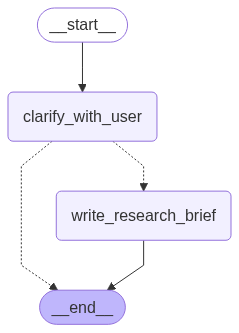

In [14]:
# 编译工作流，保存到内存，并绘制图
from IPython.display import Image, display
from langgraph.checkpoint.memory import InMemorySaver
from deep_research_from_scratch.research_agent_scope import deep_researcher_builder

checkpointer = InMemorySaver()
scope = deep_researcher_builder.compile(checkpointer=checkpointer)
display(Image(scope.get_graph().draw_mermaid_png()))

In [15]:
# 运行工作流
from utils import format_messages
from langchain_core.messages import HumanMessage

input_message = """
# 任务
根据以下提供的研究主题和描述，生成一个包含指定章节的报告。
# 研究主题
特厚煤层复杂条件下巷道围岩全生命周期稳定性控制技术研究。
# 研究描述
项目聚焦特厚煤层孤岛工作面临空巷道、断层、火成岩侵入区、淋水区等复杂地质条件下，8224、8123、8322工作面回采巷道和高抽巷道围岩全生命周期稳定性控制技术研究，运用模拟推演与现场监测结合的方式，获得巷道掘进期的快速成巷技术，以及回采期的动态补强、顶板卸压方案；构建围岩变形预测模型，结合机器学习算法分析不同阶段围岩变形规律，动态优化围岩控制参数，实现从掘进到回采全过程围岩稳定性精准控制，保障巷道安全高效服役。
# 研究报告需要包含以下的章节
一、项目提出背景（现状及存在问题）
二、项目立项的必要性
三、相关领域国内外技术现状、发展趋势及现有工作基础
四、项目目标、主要研究内容、技术指标
五、项目实施方案、技术关键（包括技术难点、创新点）
六、项目承担单位的支撑条件（包括组织措施、原辅材料供应、企业公用设施等配套条件）
七、项目计划进度
""".strip()

thread = {"configurable": {"thread_id": "1"}}
result = scope.invoke(
    {"messages": [HumanMessage(content=input_message)]}, 
    config=thread
)
format_messages(result["messages"])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ # 任务                                                                                                          │
│ 根据以下提供的研究主题和描述，生成一个包含指定章节的报告。                                                      │
│ # 研究主题                                                                                                      │
│ 特厚煤层复杂条件下巷道围岩全生命周期稳定性控制技术研究。                                                        │
│ # 研究描述                                                                                                      │
│ 项目聚焦特厚煤层孤岛工作面临空巷道、断层、火成岩侵入区、淋水区等复杂地质条件下，8224、8123、8322工作面回采巷道  │
│ 和高抽巷道围岩全生命周期稳定性控制技术研究，运用模拟推演与现场监测结合的方式，获得巷道掘进期的快速成巷技术，以  │
│ 及回采期的动态补强、顶板卸压方案；构建围岩变形预测模型，结合机器学习算法分析不同阶段围岩变形规律，动态优化围岩  │
│ 控制参数，实现从掘进到回采全过程围岩稳定性精准控制，保障巷道安全高效服役。                                      │
│ # 研究报告需要包含以下的章节                                                                                    │
│ 一、项目提出背景（现状及存在问题）                                                                              │
│ 二、项目立项的必要性                                                                                            │
│ 三、相关领域国内外技术现状、发展趋势及现有工作基础                                                              │
│ 四、项目目标、主要研究内容、技术指标                                                                            │
│ 五、项目实施方案、技术关键（包括技术难点、创新点）                                                              │
│ 六、项目承担单位的支撑条件（包括组织措施、原辅材料供应、企业公用设施等配套条件）                                │
│ 七、项目计划进度                                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 确认收到您关于特厚煤层复杂条件下巷道围岩全生命周期稳定性控制技术研究的详细需求。我已理解研究主题、具体工作面和  │
│ 所需章节结构。现在将开始研究过程，为您生成符合要求的完整报告。                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [16]:
from rich.markdown import Markdown
Markdown(result["format_constraints"])

研究报告必须包含以下章节： 一、项目提出背景（现状及存在问题） 二、项目立项的必要性                                 
三、相关领域国内外技术现状、发展趋势及现有工作基础 四、项目目标、主要研究内容、技术指标                            
五、项目实施方案、技术关键（包括技术难点、创新点）                                                                 
六、项目承担单位的支撑条件（包括组织措施、原辅材料供应、企业公用设施等配套条件） 七、项目计划进度

In [17]:
from rich.markdown import Markdown
Markdown(result["research_brief"])

我需要一份关于特厚煤层复杂条件下巷道围岩全生命周期稳定性控制技术研究的详细报告，报告需包含以下章节：一、项目提出背 
景（现状及存在问题）；二、项目立项的必要性；三、相关领域国内外技术现状、发展趋势及现有工作基础；四、项目目标、主要 
研究内容、技术指标；五、项目实施方案、技术关键（包括技术难点、创新点）；六、项目承担单位的支撑条件（包括组织措施、 
原辅材料供应、企业公用设施等配套条件）；七、项目计划进度。研究需聚焦于特厚煤层孤岛工作面临空巷道、断层、火成岩侵入 
区、淋水区等复杂地质条件下，针对8224、8123、8322工作面回采巷道和高抽巷道，运用模拟推演与现场监测结合的方式，获得巷 
道掘进期的快速成巷技术以及回采期的动态补强、顶板卸压方案；构建围岩变形预测模型，结合机器学习算法分析不同阶段围岩变 
形规律，动态优化围岩控制参数，实现从掘进到回采全过程围岩稳定性精准控制，保障巷道安全高效服役。优先参考学术期刊、官 
方技术报告和现场实践案例，避免假设未指定的成本限制或其他偏好。

In [19]:
print(result["format_constraints"])

研究报告必须包含以下章节：
一、项目提出背景（现状及存在问题）
二、项目立项的必要性
三、相关领域国内外技术现状、发展趋势及现有工作基础
四、项目目标、主要研究内容、技术指标
五、项目实施方案、技术关键（包括技术难点、创新点）
六、项目承担单位的支撑条件（包括组织措施、原辅材料供应、企业公用设施等配套条件）
七、项目计划进度
